# Volcanic Forcings: 1850-2000
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [47]:
# init
%matplotlib inline
%run -im pythonstartup
%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.dpi'] = 150
# https://stackoverflow.com/questions/41125690/matplotlib-notebook-showing-a-blank-histogram
# in case to switch back to the notebook backend, run the 2 lines below, 
# reload(plt)
# %matplotlib notebook

**2019-05-30T14:36:02.680714**
>>> Importing Python 3.7.3 packages...
[OK]: import sys, os, os.path, datetime, glob
[OK]: import numpy as np-1.16.3
[OK]: import matplotlib as mpl-3.0.3; backend: module://ipykernel.pylab.backend_inline
[OK]: #---import matplotlib.pyplot as plt
[OK]: #---from pylab import *
[OK]: import xarray as xr-0.12.1
[OK]: #---import netCDF4
[OK]: #---import dask
[OK]: #---import bottleneck
[OK]: import pandas as pd-0.24.2
[OK]: from mpl_toolkits.basemap import Basemap
      PROJ_LIB = /scratch/gpfs/GEOCLIM/wenchang/miniconda3/envs/geoclim/share/proj
>>>Import packages from Wenchang Yang (wython)...
[OK]: import geoplots as gt
[OK]: from geoplots import geoplot, fxyplot, mapplot, xticksyear
[OK]: import geoxarray
[OK]: import filter
[OK]: import xlearn
[OK]: import mysignal as sig
**Done**


In [2]:
#%matplotlib notebook
from geoplots import yticks2lat, xticksmonth

In [9]:
def ext2aod(ds, band=7):
    '''calculate volcanic aerosol AOD based on extinction coefficient.'''
    Rd = 287#J/K/kg
    T = 300#K
    g = 9.8#m/s**2
    data_name = f'extsw_b{band:02d}'
    if band == 7:
        new_name = 'AOD_550nm'
    else:
        new_name = f'AOD_b{band:02d}'
    da = ds[data_name]
    z = da.pfull.pipe(lambda x: x.isel(pfull=0)/x) \
        .pipe(lambda x: np.log(x))*Rd*T/g
    da = da.rename({'pfull': 'z'}).assign_coords(z=z.values).integrate('z') \
        .rename(new_name)
    
    return da

In [3]:
# Parameters
figname = 'figs/fig_volcanic_forcings.pdf'
data_name = 'extsw_b07'
ncfile = '/tigress/gvecchi/CM2.5/input/VOLCANIC/CMIP6/extsw_V3_DATATROP_RCP.nc'
ds = xr.open_dataset(ncfile)
da = ds[data_name].mean('lon').sum('pfull')

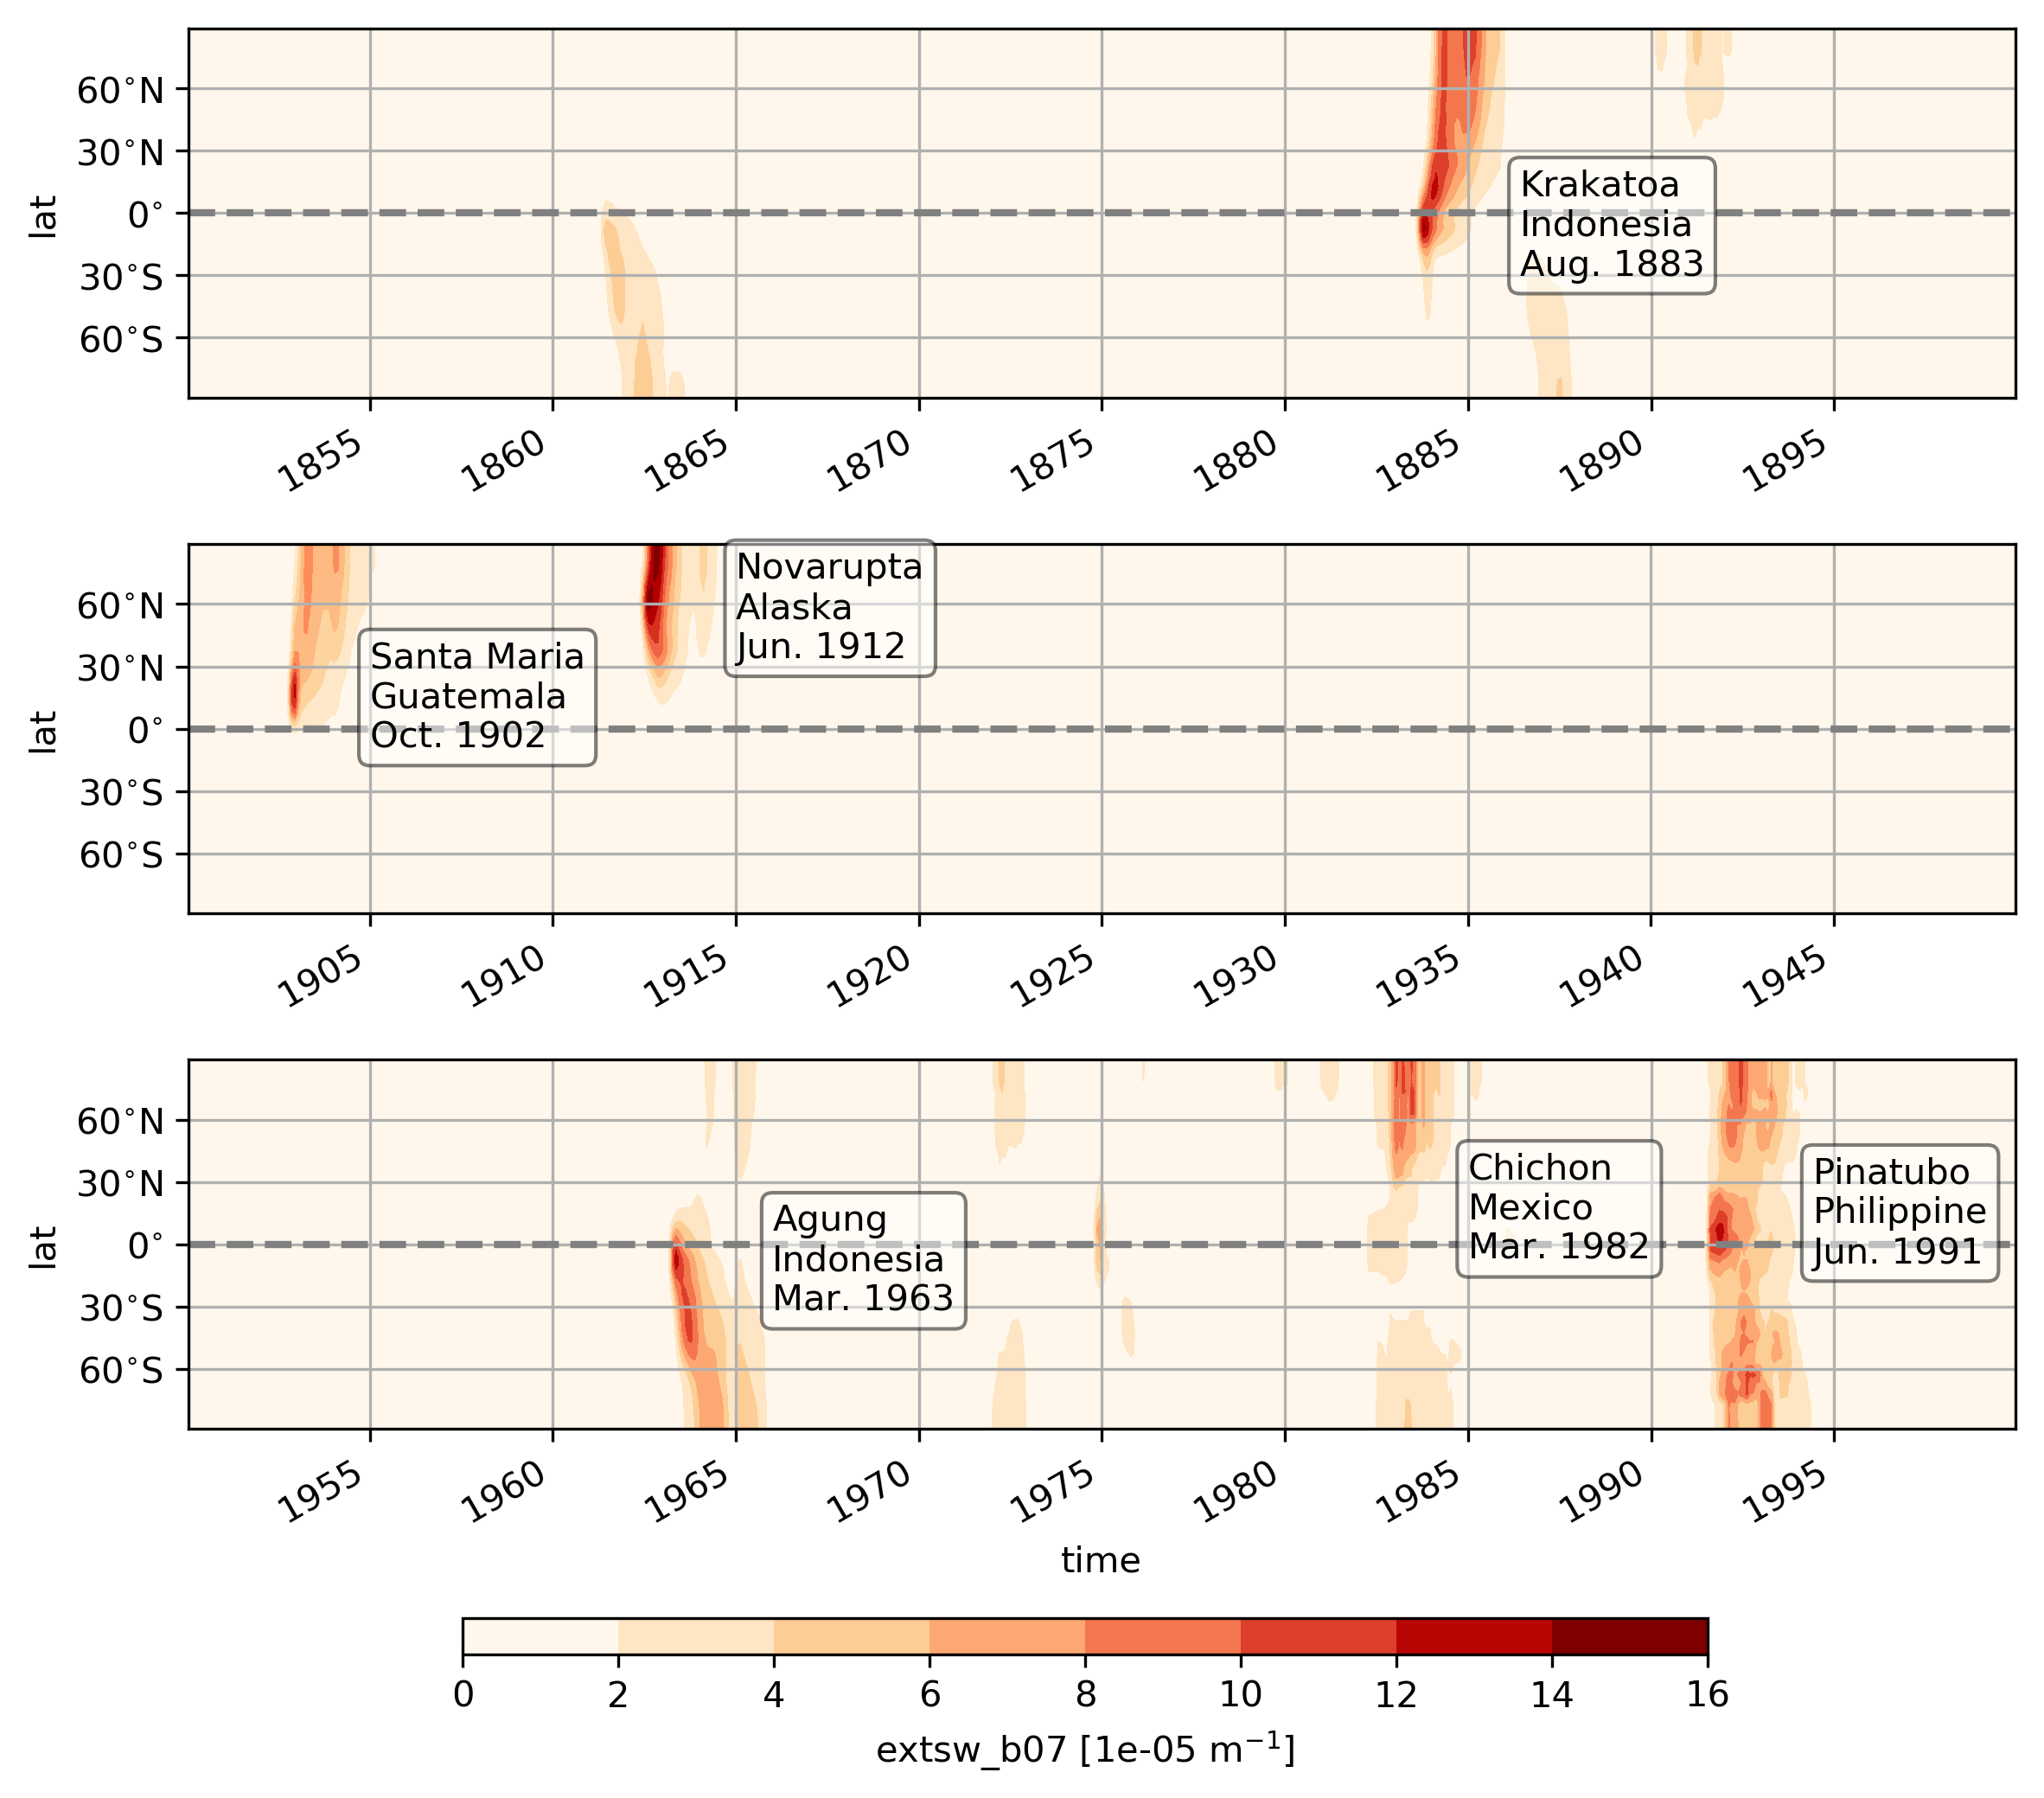

In [7]:
# CMIP6 revision with units
scale_factor = 1e5
da_ = da.pipe(lambda x:x*scale_factor)
da_['time'] = da_.indexes['time'].to_datetimeindex()
bbox = {'facecolor': 'w', 'alpha':.5, 'boxstyle': 'round'}

fig, axes = plt.subplots(3,1,figsize=(8,7), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)

ax = axes[0]
# plt.sca(ax)
da_.sel(time=slice('1850', '1899')).plot.contourf(ax=ax, x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)

ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('lat')
ax.grid(True)
ax.axhline(0, color='gray', ls='--')
ax.text('1886-06', -6, 'Krakatoa\nIndonesia\nAug. 1883', va='center', bbox=bbox)

ax = axes[1]
# plt.sca(ax)
da_.sel(time=slice('1900', '1949')).plot.contourf(ax=ax, x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('lat')
ax.grid(True)
ax.axhline(0, color='gray', ls='--')
ax.text('1915-01', 58, 'Novarupta\nAlaska\nJun. 1912', va='center', bbox=bbox)
ax.text('1905-01', 15, 'Santa Maria\nGuatemala\nOct. 1902', va='center', bbox=bbox)


ax = axes[2]
im = da_.sel(time=slice('1950', '1999')).plot.contourf(ax=ax, x='time', cmap=cmap, levels=levels,
                                                      add_colorbar=False)
ax.set_title('')
ax.grid(True)
ax.set_ylabel('lat')
ax.axhline(0, color='gray', ls='--')
ax.text('1994-06', 15, 'Pinatubo\nPhilippine\nJun. 1991', va='center', bbox=bbox)
ax.text('1985-01', 17, 'Chichon\nMexico\nMar. 1982', va='center', bbox=bbox)
ax.text('1966-01', -8, 'Agung\nIndonesia\nMar. 1963', va='center', bbox=bbox)


yticks2lat(np.arange(-60,61,30))

ax = fig.add_axes((.23,.08,.6,.02))
plt.colorbar(im, cax=ax, orientation='horizontal', label=f'{data_name} [{1/scale_factor} m$^{{-1}}$]', extend='both')

for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=30, horizontalalignment='right')



plt.tight_layout(rect=(0,.1,1,1))
# plt.savefig(figname)

<IPython.core.display.Javascript object>


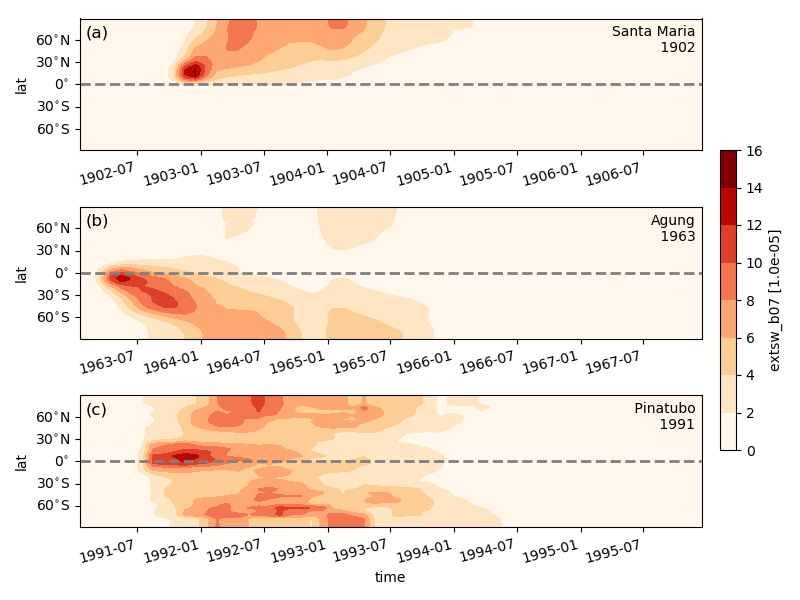

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [5]:
# 3 individual volcanic forcings
scale_factor = 1e5
fig, axes = plt.subplots(3, 1, figsize=(8,6), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)
monthticks = range(1,13,6)


plt.sca(axes[0])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1902','1906')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Santa Maria\n 1902', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(a)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Santa Maria 1902', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


plt.sca(axes[1])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1963','1967')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Agung\n 1963', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(b)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Agung 1963', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


plt.sca(axes[2])
im = da.pipe(lambda x: x*scale_factor).sel(time=slice('1991','1995')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, ' Pinatubo\n 1991', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(c)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Pinatubo 1991', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

yticks2lat(range(-60,90,30))
for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=15, horizontalalignment='right')

ax = fig.add_axes((.9,.25,.02,.5))
plt.colorbar(im, cax=ax, orientation='vertical', label=f'{data_name} [{1/scale_factor:.1e}]')

plt.tight_layout(rect=(0,0,.9,1))

plt.savefig(figname.replace('.pdf', '_SAP.pdf'))

<IPython.core.display.Javascript object>


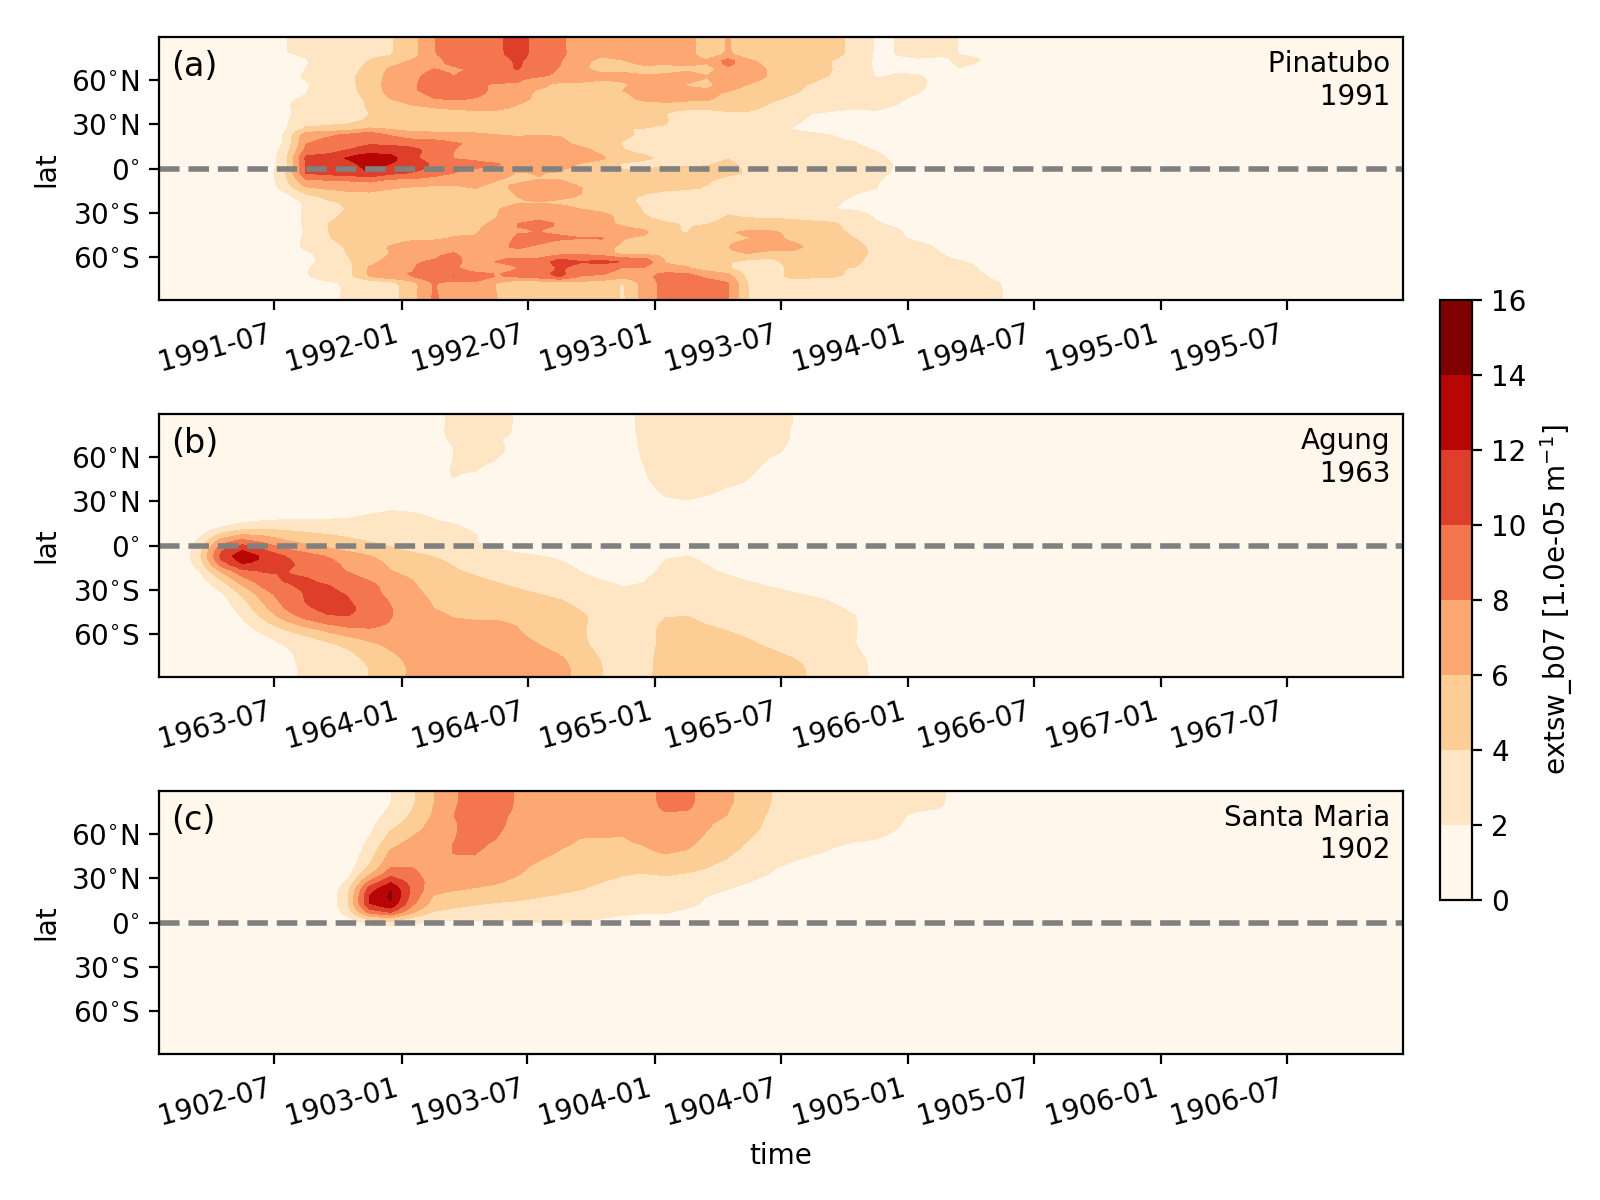

In [7]:
# 3 individual volcanic forcings: Pinatubo, Agung, Santa Maria
scale_factor = 1e5
try:
    da['time'] = da.indexes['time'].to_datetimeindex()
except:
    pass
fig, axes = plt.subplots(3, 1, figsize=(8,6), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)
monthticks = range(1,13,6)


plt.sca(axes[0])
im = da.pipe(lambda x: x*scale_factor).sel(time=slice('1991','1995')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, ' Pinatubo\n 1991', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(a)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Pinatubo 1991', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')
plt.xlabel('')
plt.ylabel('lat')


plt.sca(axes[1])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1963','1967')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Agung\n 1963', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(b)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Agung 1963', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')
plt.xlabel('')
plt.ylabel('lat')


plt.sca(axes[2])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1902','1906')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Santa Maria\n 1902', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(c)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Santa Maria 1902', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')
yticks2lat(range(-60,90,30))
plt.ylabel('lat')

for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=15, horizontalalignment='right')

ax = fig.add_axes((.9,.25,.02,.5))
plt.colorbar(im, cax=ax, orientation='vertical', label=f'{data_name} [{1/scale_factor:.1e} m$^{{-1}}$]')

plt.tight_layout(rect=(0,0,.9,1))

plt.savefig(figname.replace('.pdf', '_PAS.pdf'))

<IPython.core.display.Javascript object>


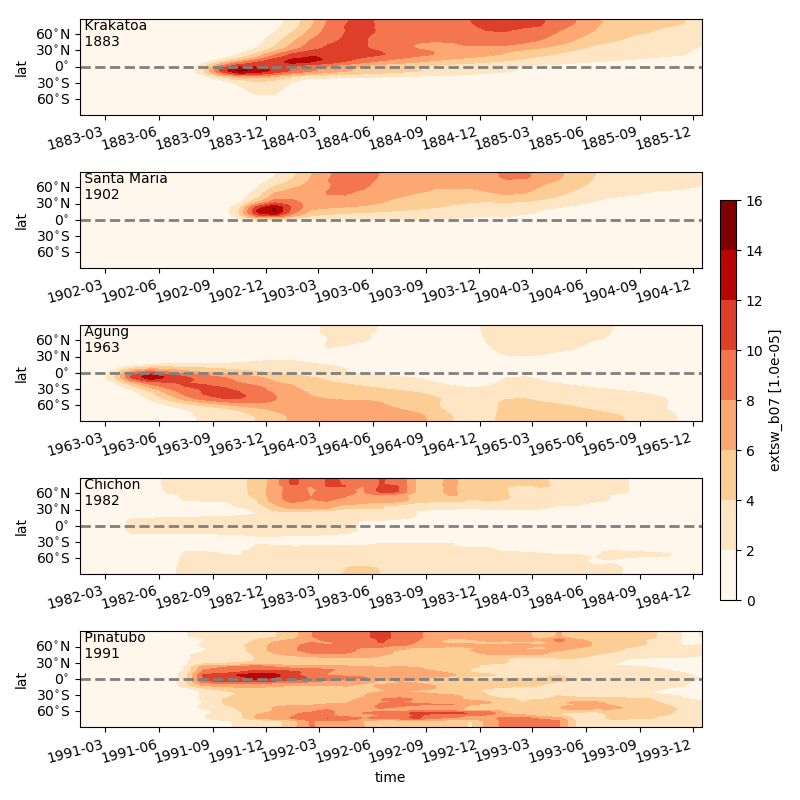

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [5]:
# 5 individual volcanic forcings
scale_factor = 1e5
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)
monthticks = range(3,13,3)

plt.sca(axes[0])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1883','1885')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Krakatoa\n 1883', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Krakatoa 1883', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


plt.sca(axes[1])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1902','1904')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Santa Maria\n 1902', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Santa Maria 1902', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


# plt.sca(axes[2])
# da.pipe(lambda x: x*scale_factor).sel(time=slice('1912','1914')).plot.contourf(x='time', cmap=cmap, levels=levels,
#                                                  add_colorbar=False)
# # plt.grid(True)
# plt.text(0,1, ' Novarupta\n 1912', transform=plt.gca().transAxes, 
#          ha='left', va='top')
# # plt.title('Novarupta 1912', loc='left')
# xticksmonth(monthticks)
# plt.axhline(0, color='gray', ls='--')

plt.sca(axes[2])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1963','1965')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Agung\n 1963', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Agung 1963', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

plt.sca(axes[3])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1982','1984')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Chichon\n 1982', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Chichon 1982', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

plt.sca(axes[4])
im = da.pipe(lambda x: x*scale_factor).sel(time=slice('1991','1993')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Pinatubo\n 1991', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Pinatubo 1991', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

yticks2lat(range(-60,90,30))
for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=15, horizontalalignment='right')

ax = fig.add_axes((.9,.25,.02,.5))
plt.colorbar(im, cax=ax, orientation='vertical', label=f'{data_name} [{1/scale_factor:.1e}]')

plt.tight_layout(rect=(0,0,.9,1))

# plt.savefig(figname)

## AOD at 550nm

In [10]:
da = ext2aod(ds, band=7).mean('lon')

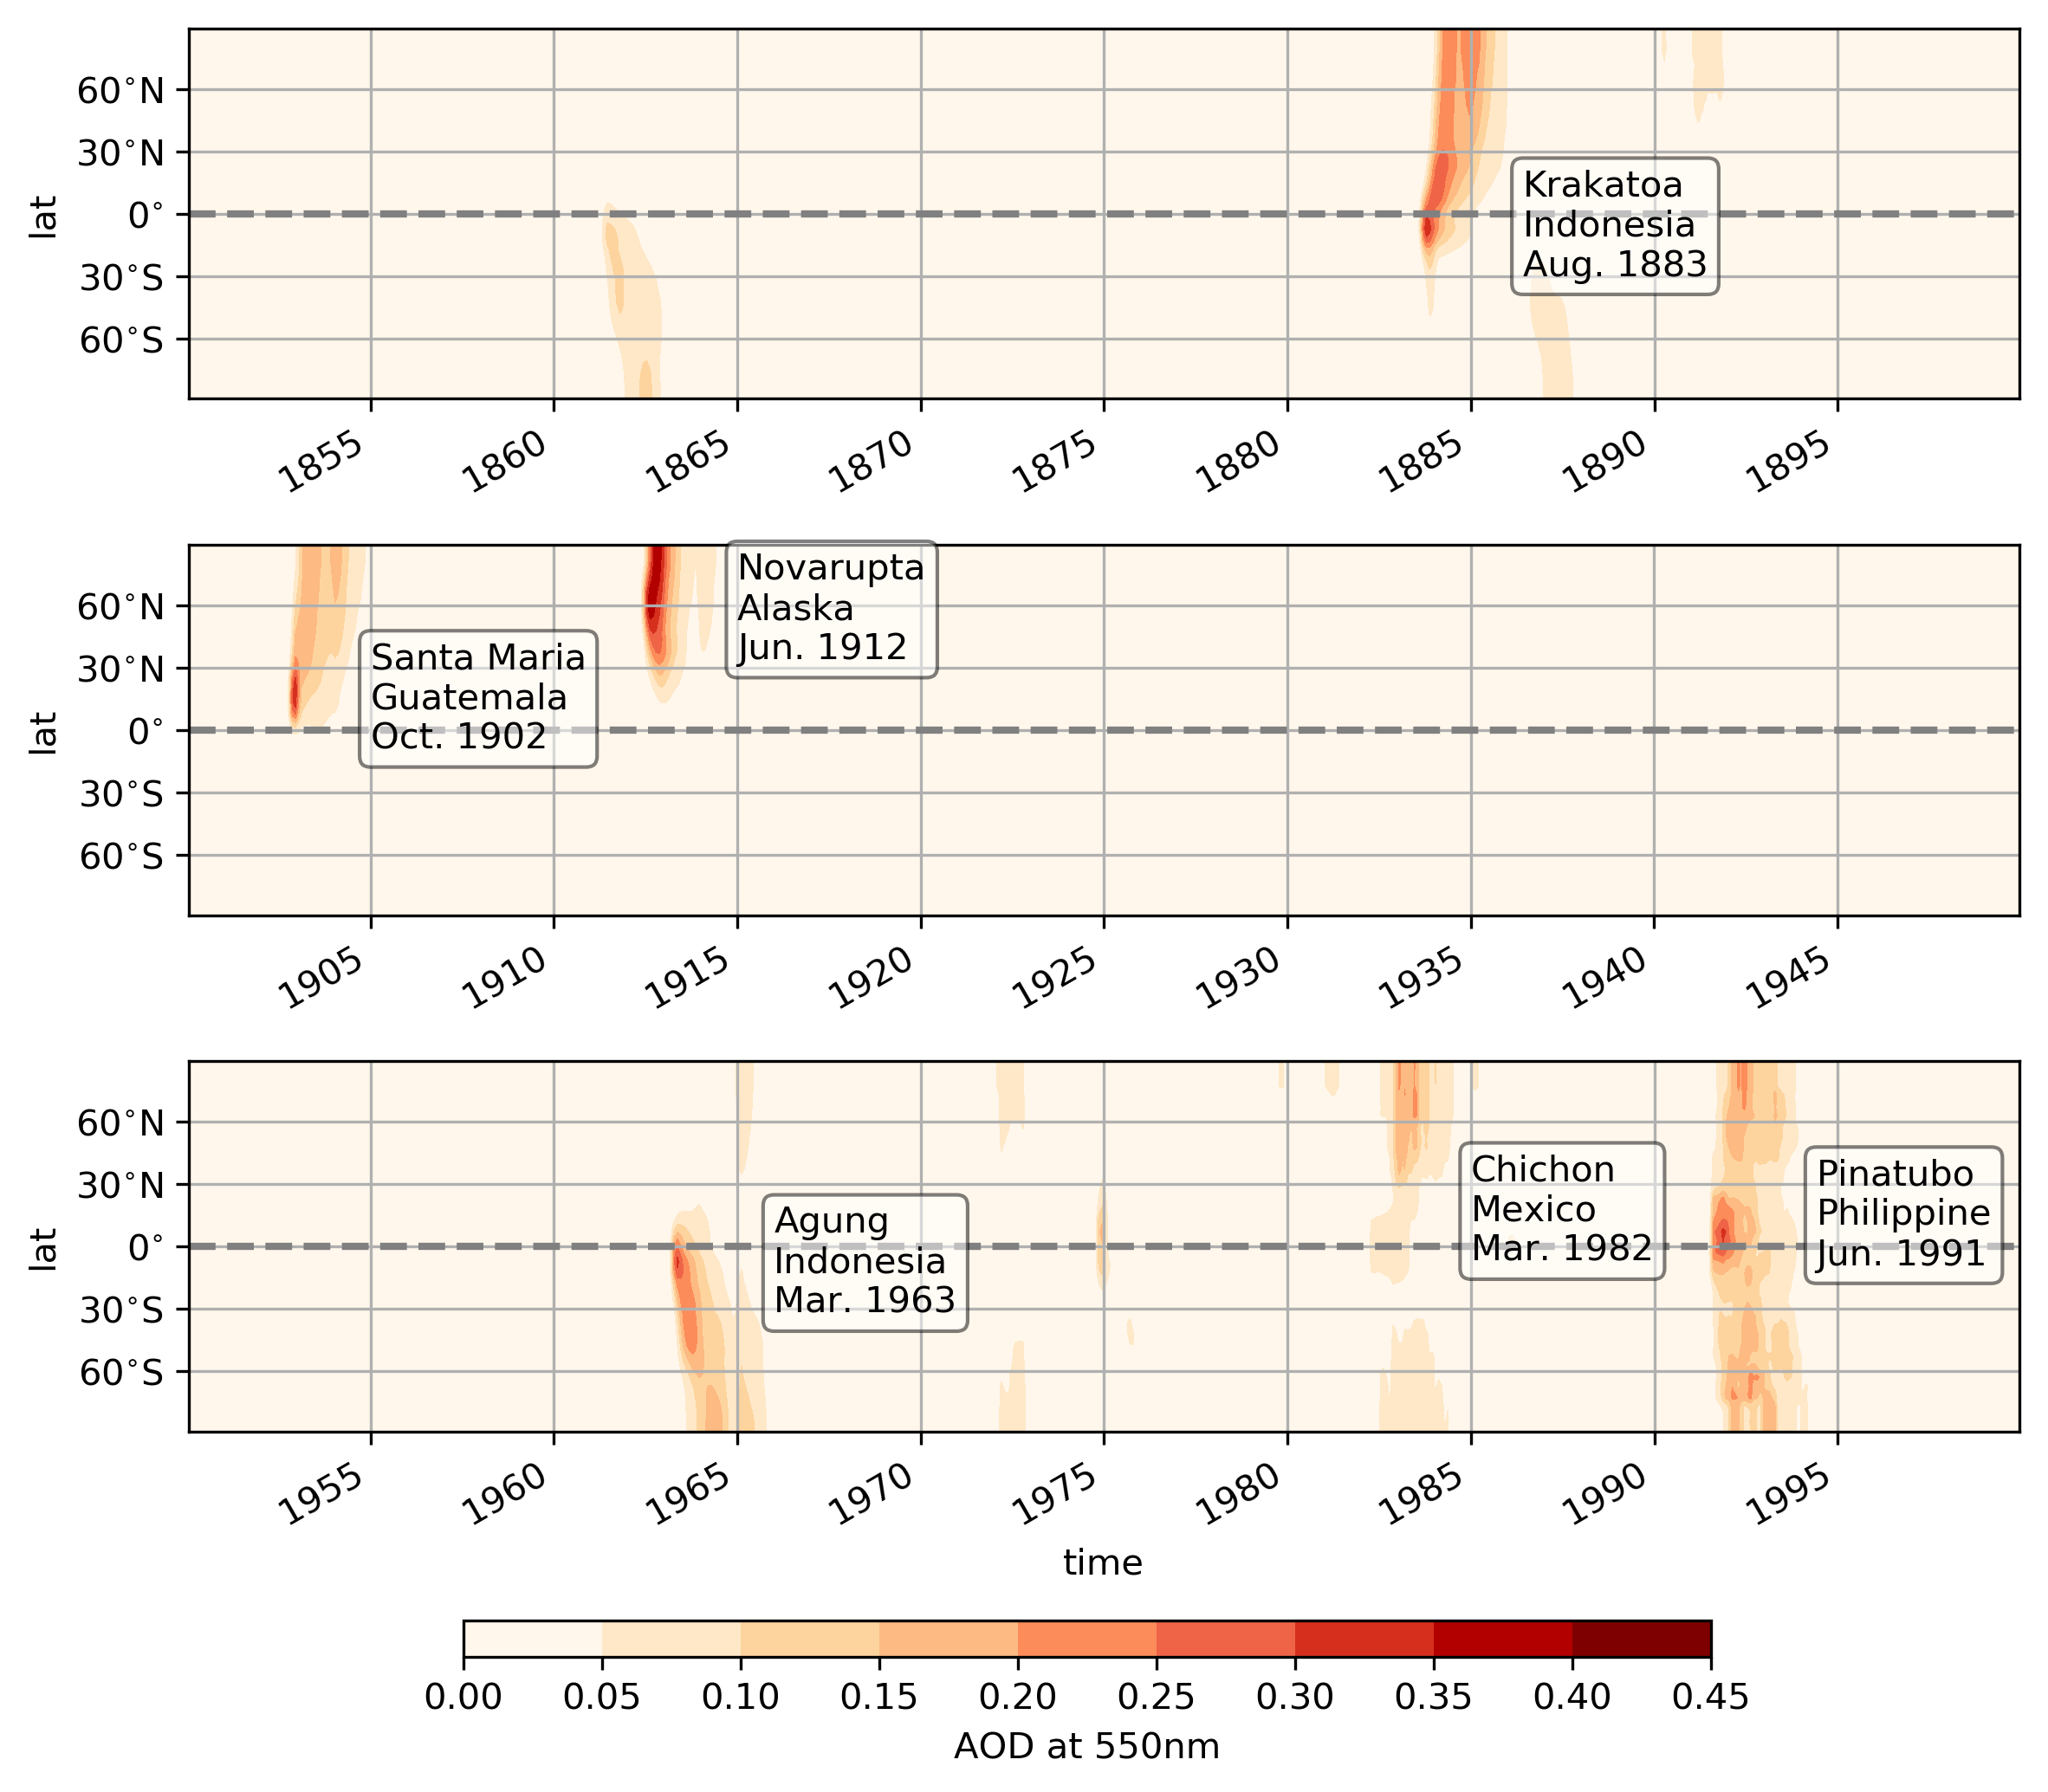

In [64]:
# CMIP6 AOD at 550nm
scale_factor = 1
da_ = da.pipe(lambda x:x*scale_factor)
da_['time'] = da_.indexes['time'].to_datetimeindex()
bbox = {'facecolor': 'w', 'alpha':.5, 'boxstyle': 'round'}

fig, axes = plt.subplots(3,1,figsize=(8,7), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,0.46,0.05)

ax = axes[0]
# plt.sca(ax)
da_.sel(time=slice('1850', '1899')).plot.contourf(ax=ax, x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)

ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('lat')
ax.grid(True)
ax.axhline(0, color='gray', ls='--')
ax.text('1886-06', -6, 'Krakatoa\nIndonesia\nAug. 1883', va='center', bbox=bbox)

ax = axes[1]
# plt.sca(ax)
da_.sel(time=slice('1900', '1949')).plot.contourf(ax=ax, x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('lat')
ax.grid(True)
ax.axhline(0, color='gray', ls='--')
ax.text('1915-01', 58, 'Novarupta\nAlaska\nJun. 1912', va='center', bbox=bbox)
ax.text('1905-01', 15, 'Santa Maria\nGuatemala\nOct. 1902', va='center', bbox=bbox)


ax = axes[2]
im = da_.sel(time=slice('1950', '1999')).plot.contourf(ax=ax, x='time', cmap=cmap, levels=levels,
                                                      add_colorbar=False)
ax.set_title('')
ax.grid(True)
ax.set_ylabel('lat')
ax.axhline(0, color='gray', ls='--')
ax.text('1994-06', 15, 'Pinatubo\nPhilippine\nJun. 1991', va='center', bbox=bbox)
ax.text('1985-01', 17, 'Chichon\nMexico\nMar. 1982', va='center', bbox=bbox)
ax.text('1966-01', -8, 'Agung\nIndonesia\nMar. 1963', va='center', bbox=bbox)


yticks2lat(np.arange(-60,61,30))

ax = fig.add_axes((.23,.08,.6,.02))
plt.colorbar(im, cax=ax, orientation='horizontal', label=f'AOD at 550nm', extend='both')

for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=30, horizontalalignment='right')



plt.tight_layout(rect=(0,.1,1,1))
figname = 'figs/fig.aod550nm.cmip6.pdf'
# plt.savefig(figname)

plt.gcf().set_facecolor('w')

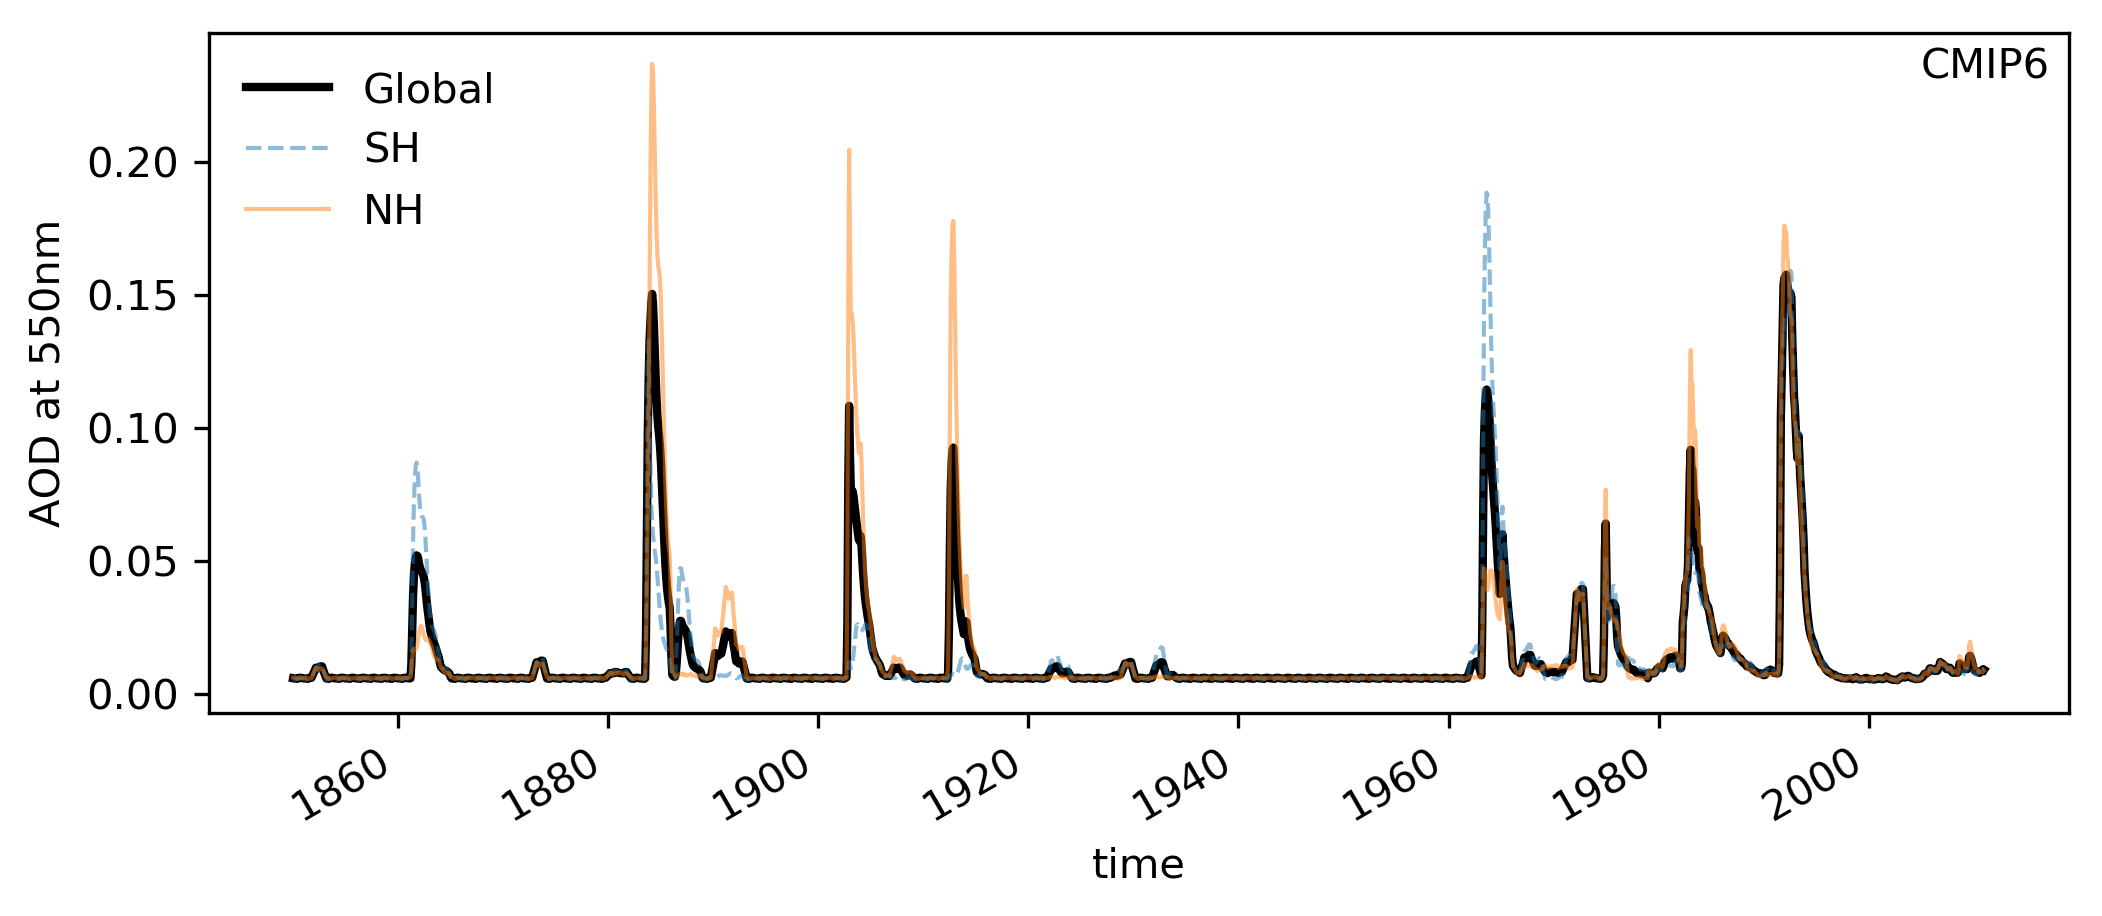

In [70]:
# Global/SH/NH mean AOD at 550nm
da.expand_dims('lon').geo.fldmean().sel(time=slice('1850', '2010')) \
    .plot(figsize=(8,3), color='k', label='Global')
da.expand_dims('lon').sel(lat=slice(-90,0)).geo.fldmean().sel(time=slice(None, '2010')) \
    .plot(alpha=0.5, label='SH', lw=1, ls='--')
da.expand_dims('lon').sel(lat=slice(0,90)).geo.fldmean().sel(time=slice(None, '2010')) \
    .plot(alpha=0.5, label='NH', lw=1)

plt.ylabel('AOD at 550nm')
plt.text(0.99, 0.98, 'CMIP6', ha='right', va='top', transform=plt.gca().transAxes)
plt.legend(loc='upper left')

# plt.tight_layout()
plt.gcf().set_facecolor('w')

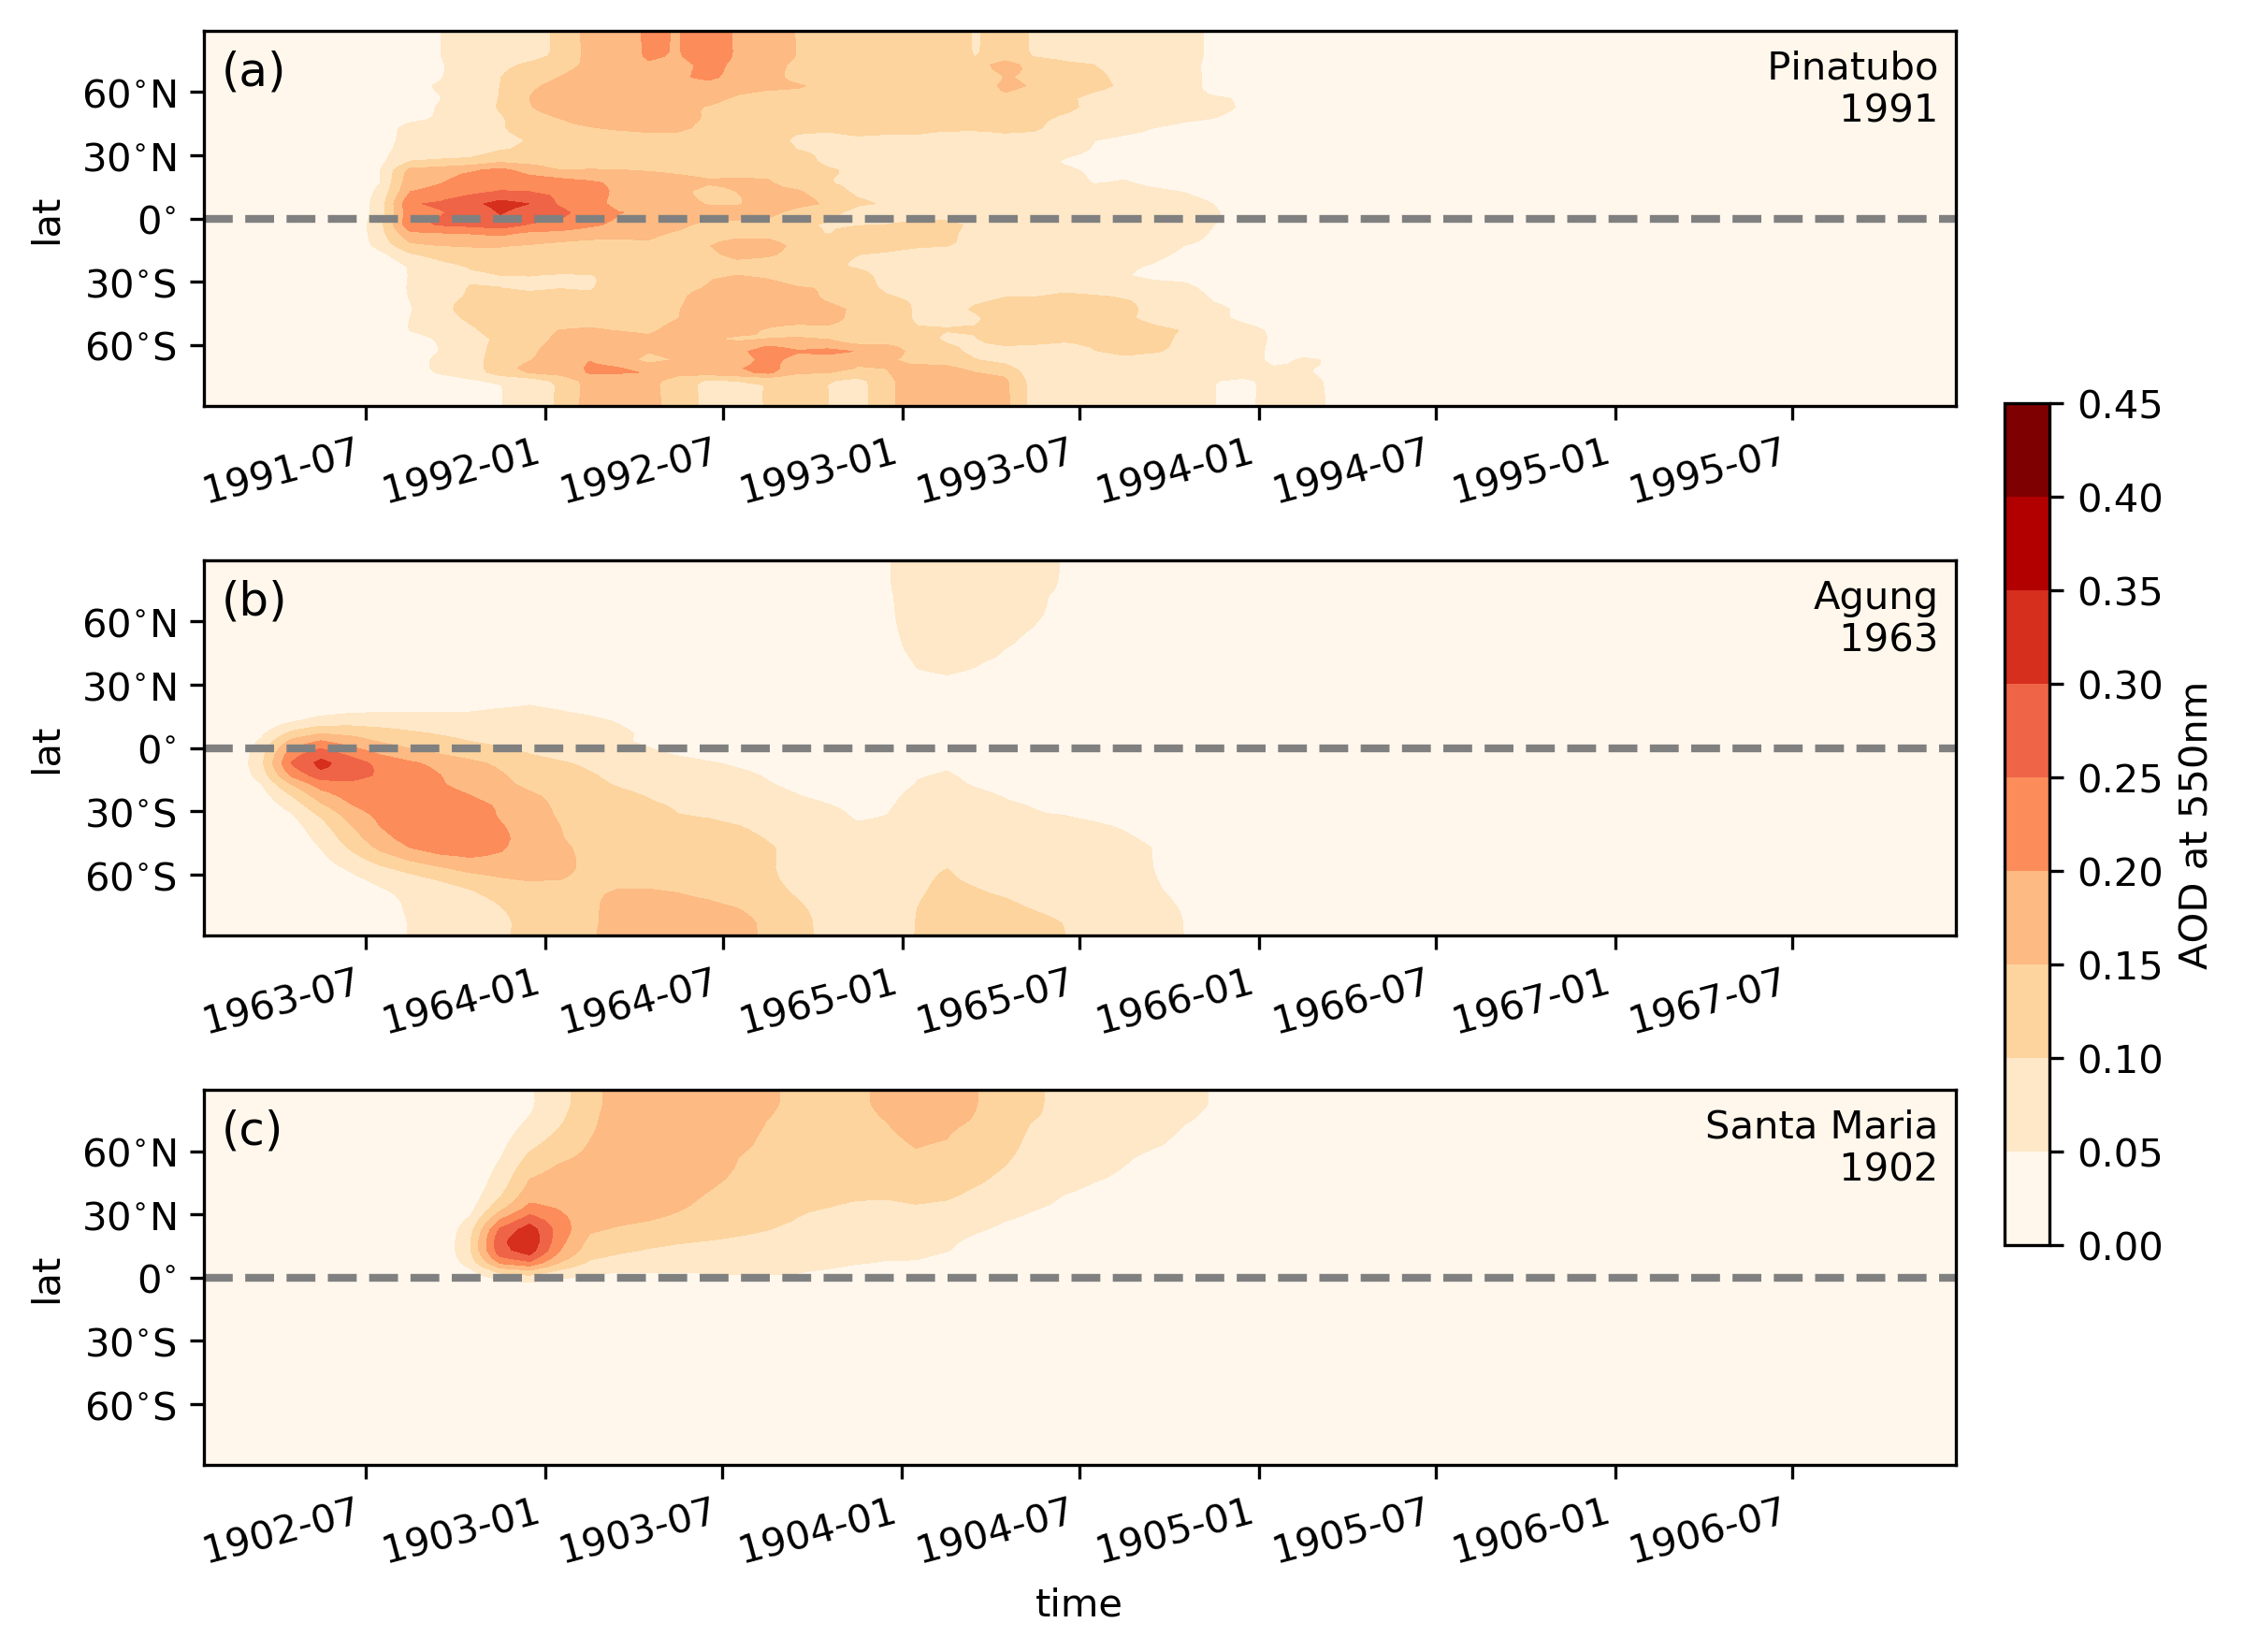

In [67]:
# 3 individual volcanic forcings: Pinatubo, Agung, Santa Maria
scale_factor = 1
try:
    da['time'] = da.indexes['time'].to_datetimeindex()
except:
    pass
fig, axes = plt.subplots(3, 1, figsize=(8,6), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,0.46,0.05)
monthticks = range(1,13,6)


plt.sca(axes[0])
im = da.pipe(lambda x: x*scale_factor).sel(time=slice('1991','1995')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, ' Pinatubo\n 1991', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(a)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Pinatubo 1991', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')
plt.xlabel('')
plt.ylabel('lat')


plt.sca(axes[1])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1963','1967')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Agung\n 1963', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(b)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Agung 1963', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')
plt.xlabel('')
plt.ylabel('lat')


plt.sca(axes[2])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1902','1906')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Santa Maria\n 1902', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(c)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Santa Maria 1902', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')
yticks2lat(range(-60,90,30))
plt.ylabel('lat')

for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=15, horizontalalignment='right')

ax = fig.add_axes((.9,.25,.02,.5))
plt.colorbar(im, cax=ax, orientation='vertical', label=f'AOD at 550nm')

plt.tight_layout(rect=(0,0,.9,1))

# plt.savefig(figname.replace('.pdf', '_PAS.pdf'))
plt.gcf().set_facecolor('w')

In [1]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>